In [5]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os
import numpy as np
import torch.utils.data as Data
from torch.autograd import Variable
import torch.nn.functional as F

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size=4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [7]:
imgs = torch.stack([img_t for img_t ,_ in trainset],dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.225
[1,  4000] loss: 1.925
[1,  6000] loss: 1.732
[1,  8000] loss: 1.616
[1, 10000] loss: 1.565
[1, 12000] loss: 1.494
[2,  2000] loss: 1.444
[2,  4000] loss: 1.423
[2,  6000] loss: 1.372
[2,  8000] loss: 1.342
[2, 10000] loss: 1.367
[2, 12000] loss: 1.325
[3,  2000] loss: 1.267
[3,  4000] loss: 1.246
[3,  6000] loss: 1.246
[3,  8000] loss: 1.246
[3, 10000] loss: 1.240
[3, 12000] loss: 1.227
[4,  2000] loss: 1.131
[4,  4000] loss: 1.161
[4,  6000] loss: 1.162
[4,  8000] loss: 1.150
[4, 10000] loss: 1.137
[4, 12000] loss: 1.137
[5,  2000] loss: 1.062
[5,  4000] loss: 1.082
[5,  6000] loss: 1.066
[5,  8000] loss: 1.064
[5, 10000] loss: 1.069
[5, 12000] loss: 1.064
[6,  2000] loss: 0.979
[6,  4000] loss: 0.998
[6,  6000] loss: 1.008
[6,  8000] loss: 1.020
[6, 10000] loss: 1.007
[6, 12000] loss: 1.021
[7,  2000] loss: 0.929
[7,  4000] loss: 0.935
[7,  6000] loss: 0.952
[7,  8000] loss: 0.958
[7, 10000] loss: 0.977
[7, 12000] loss: 0.987
[8,  2000] loss: 0.878
[8,  4000] 

(a)

In [33]:
class CNN(nn.Module):
    def __init__(self,num):
        super().__init__()
        self.num = num
        self.layers=[]
        self.f1 = nn.Linear(3072,512)
        for i in range(self.num):
            self.layers.append(nn.Linear(512,512))
        self.f2 = nn.Linear(512,10)
        
    def forward(self, x):
        x = x.view(-1,3072) 
        x = F.relu(self.f1(x))
        for i in range(self.num):
            x = F.relu(self.layers[i](x))
        x = F.dropout(x,p=0.5) 
        x = self.f2(x)
        return x 

In [55]:
def model(model,trainloader,testloader,iteration=10):
    train_pred=[]
    test_pred=
    
    for epoch in range(10):  
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            
            inputs, labels = data

       
            optimizer.zero_grad()

          
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()        

      
            running_loss += loss.item()
          
       

    print('Finished Training')
    return model,train_pred,test_pred

In [38]:
cnn_0 = CNN(0)
cnn_0_trained, train_pred_cnn_0, test_pred_cnn_0 = train_model(cnn_0,trainloader,testloader,10)

Accuracy is: 37 %
Accuracy is: 37 %
Accuracy is: 42 %
Accuracy is: 39 %
Accuracy is: 42 %
Accuracy is: 40 %
Accuracy is: 42 %
Accuracy is: 40 %
Accuracy is: 43 %
Accuracy is: 39 %
Accuracy is: 45 %
Accuracy is: 42 %
Accuracy is: 44 %
Accuracy is: 41 %
Accuracy is: 46 %
Accuracy is: 43 %
Accuracy is: 46 %
Accuracy is: 41 %
Accuracy is: 47 %
Accuracy is: 42 %
Finished Training


In [39]:
cnn_1 = CNN(1)
cnn_1_trained, train_pred_cnn_1, test_pred_cnn_1 = train_model(cnn_1,trainloader,testloader,10)

Accuracy is: 43 %
Accuracy is: 43 %
Accuracy is: 47 %
Accuracy is: 45 %
Accuracy is: 49 %
Accuracy is: 46 %
Accuracy is: 52 %
Accuracy is: 47 %
Accuracy is: 52 %
Accuracy is: 47 %
Accuracy is: 54 %
Accuracy is: 48 %
Accuracy is: 55 %
Accuracy is: 48 %
Accuracy is: 55 %
Accuracy is: 48 %
Accuracy is: 56 %
Accuracy is: 48 %
Accuracy is: 57 %
Accuracy is: 49 %
Finished Training


In [40]:
cnn_2 = CNN(2)
cnn_2_trained, train_pred_cnn_2, test_pred_cnn_2 = train_model(cnn_2,trainloader,testloader,10)

Accuracy is: 43 %
Accuracy is: 42 %
Accuracy is: 46 %
Accuracy is: 45 %
Accuracy is: 50 %
Accuracy is: 46 %
Accuracy is: 52 %
Accuracy is: 48 %
Accuracy is: 53 %
Accuracy is: 49 %
Accuracy is: 54 %
Accuracy is: 49 %
Accuracy is: 55 %
Accuracy is: 49 %
Accuracy is: 57 %
Accuracy is: 50 %
Accuracy is: 58 %
Accuracy is: 50 %
Accuracy is: 59 %
Accuracy is: 49 %
Finished Training


In [41]:
cnn_3 = CNN(3)
cnn_3_trained, train_pred_cnn_3, test_pred_cnn_3 = train_model(cnn_3,trainloader,testloader,10)

Accuracy is: 36 %
Accuracy is: 37 %
Accuracy is: 42 %
Accuracy is: 42 %
Accuracy is: 46 %
Accuracy is: 44 %
Accuracy is: 48 %
Accuracy is: 46 %
Accuracy is: 50 %
Accuracy is: 47 %
Accuracy is: 52 %
Accuracy is: 48 %
Accuracy is: 53 %
Accuracy is: 48 %
Accuracy is: 55 %
Accuracy is: 49 %
Accuracy is: 56 %
Accuracy is: 49 %
Accuracy is: 56 %
Accuracy is: 49 %
Finished Training


In [42]:
cnn_4 = CNN(4)
cnn_4_trained, train_pred_cnn_4, test_pred_cnn_4 = train_model(cnn_4,trainloader,testloader,10)

Accuracy is: 27 %
Accuracy is: 27 %
Accuracy is: 34 %
Accuracy is: 34 %
Accuracy is: 38 %
Accuracy is: 38 %
Accuracy is: 41 %
Accuracy is: 41 %
Accuracy is: 43 %
Accuracy is: 43 %
Accuracy is: 45 %
Accuracy is: 44 %
Accuracy is: 47 %
Accuracy is: 45 %
Accuracy is: 48 %
Accuracy is: 46 %
Accuracy is: 50 %
Accuracy is: 47 %
Accuracy is: 51 %
Accuracy is: 47 %
Finished Training


In [45]:
net_trained, train_pred_net, test_pred_net = train_model(net,trainloader,testloader,10)

Accuracy is: 75 %
Accuracy is: 62 %
Accuracy is: 74 %
Accuracy is: 61 %
Accuracy is: 74 %
Accuracy is: 61 %
Accuracy is: 76 %
Accuracy is: 62 %
Accuracy is: 76 %
Accuracy is: 61 %
Accuracy is: 71 %
Accuracy is: 58 %
Accuracy is: 79 %
Accuracy is: 63 %
Accuracy is: 76 %
Accuracy is: 60 %
Accuracy is: 78 %
Accuracy is: 61 %
Accuracy is: 79 %
Accuracy is: 61 %
Finished Training


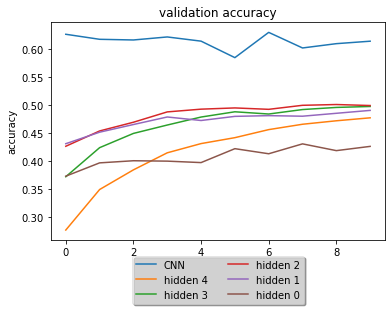

In [47]:
x=[0,1,2,3,4,5,6,7,8,9]
plt.plot(x, test_pred_net, label=f"CNN")
plt.plot(x, test_pred_cnn_4,label=f"hidden 4")
plt.plot(x, test_pred_cnn_3,label=f"hidden 3")
plt.plot(x, test_pred_cnn_2,label=f"hidden 2")
plt.plot(x, test_pred_cnn_1,label=f"hidden 1")
plt.plot(x, test_pred_cnn_0,label=f"hidden 0")
plt.title('validation accuracy')
plt.ylabel('accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

We can see that the convolutional neural network is better than the other simple dense neural networks.
When the number of hidden layer increase, the performance decrease. 
Because the optimization is more difficult, the optimizer fails to find the best weights, the accuracy of neural networks are around 40% for the 10 epochs. Hence,the CNN is much better.

(b)